In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target


In [12]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)
svm = SVC()
dt = DecisionTreeClassifier(random_state=42)

rf_kfold = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
svm_kfold = cross_val_score(svm, X, y, cv=kf, scoring='accuracy')
dt_kfold = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')

print("K-Fold Cross-Validation Accuracy:")
print("Random Forest:", rf_kfold.mean())
print("SVM:", svm_kfold.mean())
print("Decision Tree:", dt_kfold.mean())


K-Fold Cross-Validation Accuracy:
Random Forest: 0.9600000000000002
SVM: 0.9666666666666668
Decision Tree: 0.9533333333333335


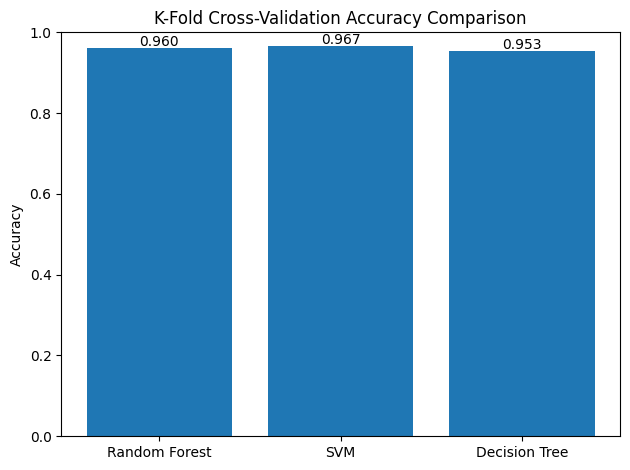

In [13]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'SVM', 'Decision Tree']
kfold_means = [rf_kfold.mean(), svm_kfold.mean(), dt_kfold.mean()]

plt.figure()
plt.bar(models, kfold_means)

plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Accuracy Comparison')

for i, v in enumerate(kfold_means):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center') \

plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [3]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_skf = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')
svm_skf = cross_val_score(svm, X, y, cv=skf, scoring='accuracy')
dt_skf = cross_val_score(dt, X, y, cv=skf, scoring='accuracy')

print("\nStratified K-Fold Cross-Validation Accuracy:")
print("Random Forest:", rf_skf.mean())
print("SVM:", svm_skf.mean())
print("Decision Tree:", dt_skf.mean())



Stratified K-Fold Cross-Validation Accuracy:
Random Forest: 0.9466666666666667
SVM: 0.9666666666666668
Decision Tree: 0.9533333333333335


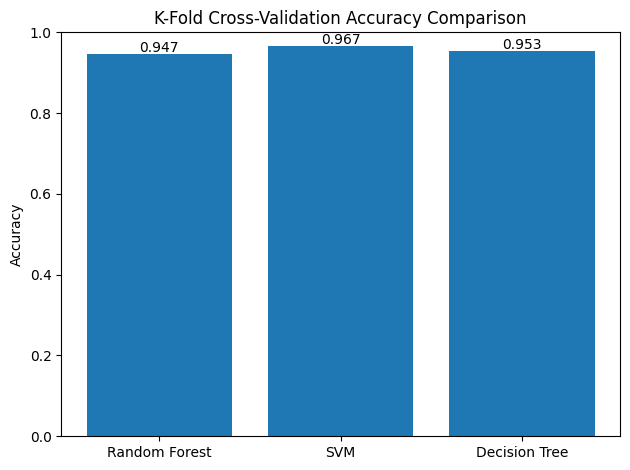

In [14]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'SVM', 'Decision Tree']
kfold_means = [rf_skf.mean(), svm_skf.mean(), dt_skf.mean()]

plt.figure()
plt.bar(models, kfold_means)

plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Accuracy Comparison')

for i, v in enumerate(kfold_means):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center') \

plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [4]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X, y)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

best_rf = grid.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9666666666666668


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1 Score: 0.9665831244778613

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



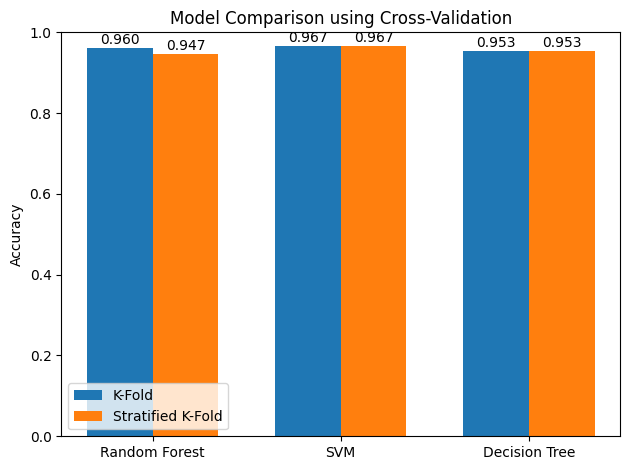

In [15]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'SVM', 'Decision Tree']

kfold_means = [rf_kfold.mean(), svm_kfold.mean(), dt_kfold.mean()]
skf_means = [rf_skf.mean(), svm_skf.mean(), dt_skf.mean()]

x = np.arange(len(models))
width = 0.35

plt.figure()
plt.bar(x - width/2, kfold_means, width, label='K-Fold')
plt.bar(x + width/2, skf_means, width, label='Stratified K-Fold')

plt.ylabel('Accuracy')
plt.title('Model Comparison using Cross-Validation')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()

for i in range(len(models)):
    plt.text(x[i] - width/2, kfold_means[i] + 0.01, f"{kfold_means[i]:.3f}", ha='center')
    plt.text(x[i] + width/2, skf_means[i] + 0.01, f"{skf_means[i]:.3f}", ha='center')

plt.tight_layout()
plt.show()
